****Chaînes de Markov : Propagation d’une épidémie dans une population****

**I. Description du premier modèle**

**1. Combien d'états y at-il ? Quelle est la taille du vecteur de probabilité initiale, quelle est la taille de la matrice de transition ?**

Il y a 3 états : Sain (S), Infecté (I), et Guéri (R).
La taille du vecteur de probabilité initiale (π₀) est égale au nombre d'états, donc 3.
La taille de la matrice de transition (A) est carrée et dépend du nombre d'états. Donc, dans ce cas, c'est une matrice 3x3.

In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

**2. Le vecteur de probabilité initiale est donné dans la description comme suit :**   

In [2]:
pi_0 = np.array([0.9, 0.1, 0])

**3.  Matrice de Transition A:**


In [3]:
A = np.array([[0.92, 0.08, 0], [0, 0.93, 0.07], [0, 0, 1]])

In [4]:
def is_stochastic(matrix):
    """Renvoie True si la ssomme de chaque ligne vaut 1 """
    rows, cols = matrix.shape
    for i in range(rows):
        row_sum = sum(matrix[i, :])
        if abs(row_sum - 1) > 1e-10:
            return False
    return True


**Assertion: testons si A est stochastique**

In [5]:
if is_stochastic(A):
    print("La matrice A est stochastique.")
else:
    print("La matrice A n'est pas stochastique.")


La matrice A est stochastique.


**I.1   Distribution théorique**

**1.  Probabilité pour un individu d'être sain, infecté ou guéri au temps t = 1.**

**P(S)**= 0.9*0.92=0.828  

**P(I)**= (0.1* 0.93)+(0.1*0.07)=0.165

**P(R)**= 0.1*0.07

**2.  Probabilité pour un individu d'être sain, infecté ou guéri au temps t = 2.**

**P(S)**= 0.92* 0.828 = 0.76176

**P(I)** = (0.08* 0.828)+(0.93* 0.165) = 0.21969

**P(R)** = 0.07* 0.165 = 0.01155

**3. De même pour chaque temps t entre 1 et 200, calculez la distribution théorique des effectifs dans
chaque état (Rappel πt+1 = πtA )**

In [6]:
def Distrib_Theorique():
    """Affiche les distributions qui contiennent les probabilités pour chaque état à chaque temps t"""
distributions = [pi_0]
for t in range(150):
    pi_t = distributions[-1]  # Récupérer la dernière distribution
    pi_t_plus_1 = np.dot(pi_t, A)
    distributions.append(pi_t_plus_1)
#print(distributions)



**4. Représentation graphique de la probabilité d’être dans chaque état en fonction du temps. (+ décrivez
un peu ce que vous observez)**

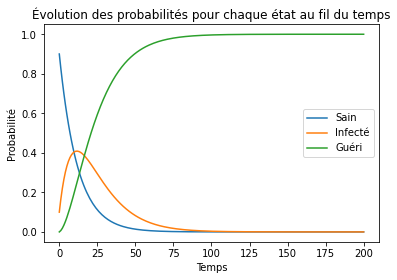

In [7]:
# Initialiser une liste pour stocker les distributions à chaque temps t
distributions = [pi_0]

# Calculer les distributions pour chaque temps t jusqu'à t = 200
for t in range(200):
    pi_t = distributions[-1]  # Récupérer la dernière distribution
    pi_t_plus_1 = np.dot(pi_t, A)
    distributions.append(pi_t_plus_1)

# Convertir les distributions en un tableau NumPy pour une manipulation plus facile
distributions_array = np.array(distributions)

# Créer un graphique pour chaque état
plt.plot(distributions_array[:, 0], label='Sain')
plt.plot(distributions_array[:, 1], label='Infecté')
plt.plot(distributions_array[:, 2], label='Guéri')

# Ajouter des titres et des légendes
plt.title('Évolution des probabilités pour chaque état au fil du temps')
plt.xlabel('Temps')
plt.ylabel('Probabilité')
plt.legend()

# Afficher le graphique
plt.show()


***Observation***

On observe que la courbe de la probabilité qu'un individu soit sain(P(S)) est maximale à t=0 puis décroît progressivement jusqu''à t=75 où elle s'annule. On a une croissance exponentielle négative de P(S).
Parallèlement, les courbes de la probabilité qu'un individu soit infecté(P(I)) et de la probabilité qu'un individu soit guéri(P(R))sont nulles à t=0; elles croissent progresseviement puis à t=6.25, P(I) atteint sa valeur maximale(P(I)=0.4) et diminue progressivement jusqu'à s'annuler à t=75; P(R) augmente infiniment au fil du temps: on observe une croissance exponentielle positive de sa courbe.

**I.2 Distribution observée**

***1.2.1  Tirage aléatoire des états***

In [8]:
T=150
Effectif=200

In [19]:
def generate_sequence(T, vect_i, M_trans):
    sequence = []   # états par lesquels un individu est passé durant T jours
    current_state = np.random.choice([0, 1, 2], p=vect_i)  # ici on associe les chiffres 0,1 et 2 respectivement aux états"sain", "infecté", "Guéri"

    for _ in range(T):
        sequence.append(current_state)
        current_state = np.random.choice([0, 1, 2], p=M_trans[current_state])
        print(M_trans[current_state])
    #print(np.array(sequence))

    return np.array(sequence)

***1.2.2 Modélisation d'une population***

In [10]:
def Generate_Pop(effectif, temps, vect_i, M_trans):
    population = []
    for i in range(effectif):
        sequence = generate_sequence(temps, vect_i, M_trans)
        population.append(sequence)
    #print(np.array(population))
    return population






***Evolution d'une population de 200 individus***

In [11]:
Population=Generate_Pop(Effectif,T,pi_0,A)
Population

[array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

**1. A chaque temps t, comptez le nombre d’individus sains, infectés et guéris dans la population et affichez l'évolution du nombre d'individus dans les 3 états en fonction du temps**


**2. Affichez le pourcentage d’indivudus sains infectés et guéris en fonction du temps.**

In [16]:
def Repartition_Pop(population,effectif):
    S = np.zeros(T)
    I = np.zeros(T)
    G = np.zeros(T)

    # Pour chaque individu
    for p in range(effectif):
        for t in range(T):   # À chaque temps
            S[t] += np.sum(population[p][t] == 0)
            I[t] += np.sum(population[p][t] == 1)
            G[t] += np.sum(population[p][t] == 2)
            print(S[t], I[t], G[t])

    # Afficher l'évolution du nombre d'individus dans les trois états
    plt.plot(S, label='Sain')
    plt.plot(I, label='Infecté')
    plt.plot(G, label='Guéri')

    # Ajouter des titres et des légendes
    plt.title('Évolution du nombre d\'individus dans chaque état en fonction du temps')
    plt.xlabel('Temps')
    plt.ylabel('Nombre d\'individus')
    plt.legend()
    plt.show()
    
     # Calculer le pourcentage d'individus sains, infectés et guéris en fonction du temps
    pourcentage_S = (S / effectif) 
    pourcentage_I = (I / effectif) 
    pourcentage_G = (G / effectif) 

    # Afficher l'évolution du pourcentage d'individus dans chaque état
    plt.plot(pourcentage_S, label='Pourcentage d\'individus Sains')
    plt.plot(pourcentage_I, label='Pourcentage d\'individus Infectés')
    plt.plot(pourcentage_G, label='Pourcentage d\'individus Guéris')

    # Ajouter des titres et des légendes
    plt.title('Évolution du pourcentage d\'individus dans chaque état en fonction du temps')
    plt.xlabel('Temps')
    plt.ylabel('Pourcentage d\'individus')
    plt.legend()
    plt.show()


    #return S, I, G


**DEMANDER A LA PROF SI C'EST VRAIMENT CE QUI EST DEMANDE !!**

0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 

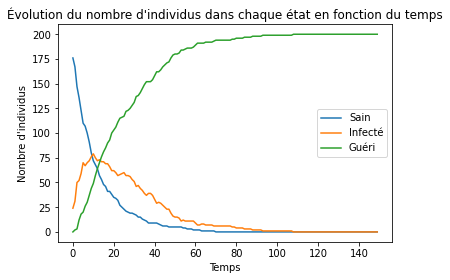

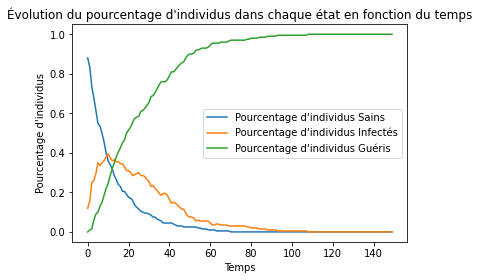

In [17]:
Repartition_Pop(Population, Effectif)

**3. Quand t est grand, les proportions d'individus sains et infectés sont nulles tandisque celle des individus guéris est est maximale(100%)**

**4. Refaites les questions précédentes avec des populations de tailles différentes, 5 individus et 5000
individus par exemple.**

**Population de 5 individus**

1.0 0.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 

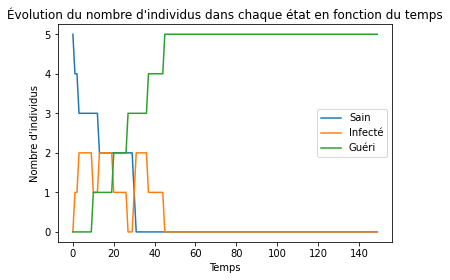

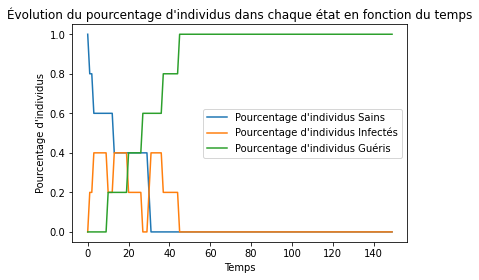

In [18]:
Pop5=Generate_Pop(5,T,pi_0,A)
Repartition_Pop(Pop5,5)

**Population de 5000 individus**

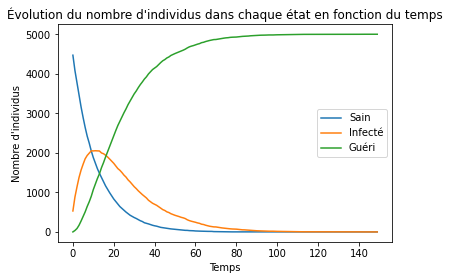

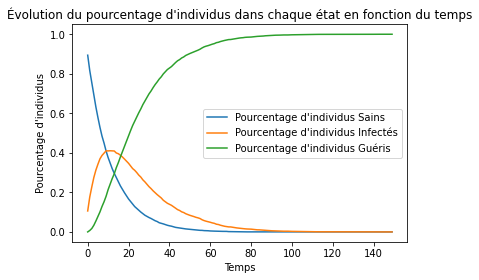

In [15]:
Pop5000=Generate_Pop(5000,T,pi_0,A)
Repartition_Pop(Pop5000,5000)